In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
# 배열 변환
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
# 데이터 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
#CNN Model
model = models.Sequential()

In [8]:
model.add(layers.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(3, 3))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(3, 3))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
#model compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,914 (140.29 KB)

 Trainable params: 35,914 (140.29 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
modelpath = "./model_storage/MNIST_MLP_3.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor="val_looss", verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10)

In [12]:
#model train
history = model.fit(train_images, train_labels, epochs=30, validation_split=0.2, batch_size=200,
                    verbose=1, callbacks=[checkpointer, early_stopping_callback])

Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5582 - loss: 1.3292 - val_accuracy: 0.7785 - val_loss: 0.5659
Epoch 2/30
 25/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7918 - loss: 0.5509

c:\Users\user\anaconda3\envs\owen\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_looss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8053 - loss: 0.5248 - val_accuracy: 0.8292 - val_loss: 0.4715
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8410 - loss: 0.4418 - val_accuracy: 0.8457 - val_loss: 0.4266
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8566 - loss: 0.3995 - val_accuracy: 0.8653 - val_loss: 0.3856
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8680 - loss: 0.3707 - val_accuracy: 0.8664 - val_loss: 0.3739
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8777 - loss: 0.3454 - val_accuracy: 0.8767 - val_loss: 0.3490
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8835 - loss: 0.3203 - val_accuracy: 0.8801 - val_loss: 0.3410
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8923 - loss: 0.3059 - val_accuracy: 0.8869 - val_loss: 0.3206
Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8923 - loss: 0.2987 - val_accuracy: 0.8857 - val_

In [13]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

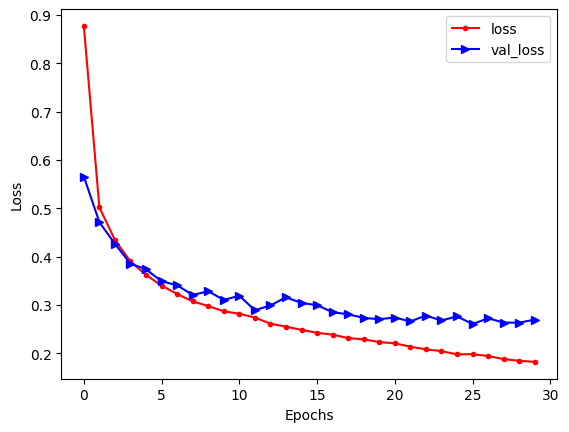

In [19]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_loss, marker='.', c='red', label="loss")
plt.plot(x_len, y_vloss, marker='>', c='blue', label="val_loss")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [25]:
model2 = models.Sequential()

model2.add(layers.Input(shape=(28, 28, 1)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(3, 3))
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D(3, 3))
model2.add(layers.Dropout(0.25))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.25))
model2.add(layers.Dense(10, activation='softmax'))

In [26]:
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [27]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,474 (72.16 KB)

 Trainable params: 18,474 (72.16 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history2 = model2.fit(train_images, train_labels, epochs=30, batch_size=200, verbose=1, validation_split=0.2, callbacks=[checkpointer, early_stopping_callback])

Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4182 - loss: 1.6258 - val_accuracy: 0.7611 - val_loss: 0.6646
Epoch 2/30
 24/240 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7145 - loss: 0.7682

c:\Users\user\anaconda3\envs\owen\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_looss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7229 - loss: 0.7464 - val_accuracy: 0.7885 - val_loss: 0.5626
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7620 - loss: 0.6395 - val_accuracy: 0.8183 - val_loss: 0.5002
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7815 - loss: 0.5890 - val_accuracy: 0.8303 - val_loss: 0.4649
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7975 - loss: 0.5420 - val_accuracy: 0.8423 - val_loss: 0.4335
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8090 - loss: 0.5213 - val_accuracy: 0.8537 - val_loss: 0.4091
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8173 - loss: 0.4963 - val_accuracy: 0.8569 - val_loss: 0.3978
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8265 - loss: 0.4745 - val_accuracy: 0.8633 - val_loss: 0.3809
Epoch 9/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8292 - loss: 0.4667 - val_accuracy: 0.8614 - val_

In [29]:
y_vloss = history2.history['val_loss']
y_loss = history2.history['loss']

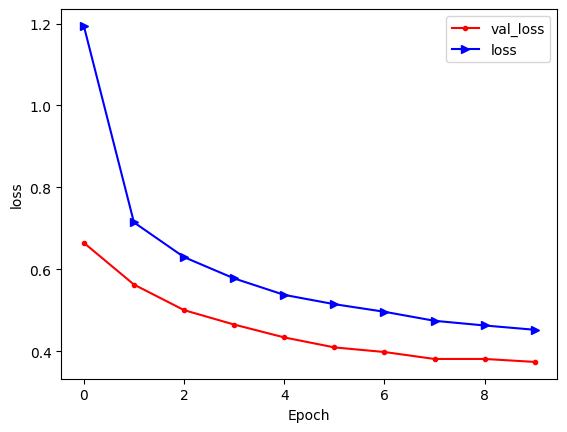

In [30]:
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="val_loss")
plt.plot(x_len, y_loss, marker='>', c='blue', label="loss")
plt.legend(loc='upper right')
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

In [50]:
#model train
history2 = model2.fit(train_images, train_labels, epochs=30, validation_split=0.2, batch_size=200,
                    verbose=1, callbacks=[checkpointer, early_stopping_callback])

Epoch 1/30
238/240 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9336 - loss: 0.1780
Epoch 1: val_loss did not improve from 0.27004
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9336 - loss: 0.1781 - val_accuracy: 0.9021 - val_loss: 0.2781
Epoch 2/30
239/240 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9348 - loss: 0.1814
Epoch 2: val_loss did not improve from 0.27004
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9348 - loss: 0.1814 - val_accuracy: 0.9047 - val_loss: 0.2761
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9337 - loss: 0.1808
Epoch 3: val_loss did not improve from 0.27004
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9337 - loss: 0.1808 - val_accuracy: 0.9053 - val_loss: 0.2840
Epoch 4/30
238/240 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9369 - loss: 0.1720
Epoch 4: val_loss did not improve from 0.27004
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9369 - loss: 0.1720 - val_accuracy: 0.9045 - val_loss:

In [51]:
y_vloss = history2.history['val_loss']
y_loss = history2.history['loss']

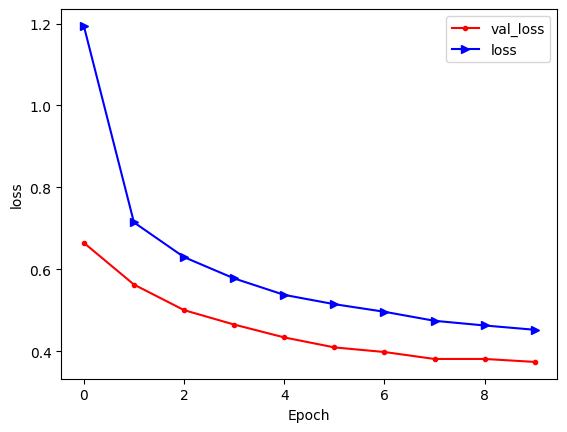

In [31]:
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="val_loss")
plt.plot(x_len, y_loss, marker='>', c='blue', label="loss")
plt.legend(loc='upper right')
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()